In [1]:
%pylab qt
%matplotlib inline
import pandas
from scipy.fftpack import fft as fft
from scipy.io import wavfile
from scipy import signal

def make_fft(x,y):
    N = len(x)
    T = x[1]-x[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    return xf, 2.0/N * np.abs(yf[0:N//2])

def note_frequency(note):
    """
    note is the note name as a string
    give the note frequency in Hz
    eg: note_frequency("la3") returns 440
    """
    name = note[:2]
    if name == "do":
        fundamental = 32.7
    elif name == "re":
        fundamental = 36.71
    elif name == "mi":
        fundamental = 41.2
    elif name == "fa":
        fundamental = 43.65
    elif name == "so":
        fundamental = 49.
    elif name == "la":
        fundamental = 55.
    elif name == "si":
        fundamental = 61.74
    octave = int(note[-1])
    return fundamental*2**octave

def mysavefig(name):
    plt.tight_layout()
    plt.savefig("../../images/"+name, dpi=200)

Populating the interactive namespace from numpy and matplotlib


In [4]:
for note in ["do", "re", "mi", "fa", "sol", "la", "si"]:
    print(note, note_frequency(note+"3"))

do 261.6
re 293.68
mi 329.6
fa 349.2
sol 392.0
la 440.0
si 493.92


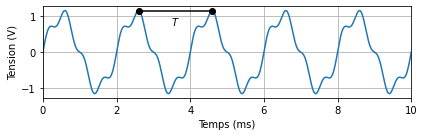

In [3]:
f     = 500
omega = 2*np.pi*f
T     = 1/f

t         = np.linspace(0,0.5,100000)
amplitude = np.sin(omega*t) + 0.2*np.sin(4*omega*t)

plt.figure(figsize=(6,2))
ax = plt.subplot2grid((1,1), (0,0))
ax.plot(t*1000, amplitude)

ax.set_xlabel("Temps (ms)")
ax.set_ylabel("Tension (V)")

x = np.array([T/4, 5*T/4])+T+T/20
y = amplitude.max()*np.ones(len(x))
ax.plot(x*1000, y, "o-", color="k")
ax.annotate("$T$", (mean(x)*1000, y[0]),(mean(x)*1000, y[0]*0.9), ha='center', va='top')
ax.set_xlim(0, 10)
ax.grid()

mysavefig("periodic_signal.png")

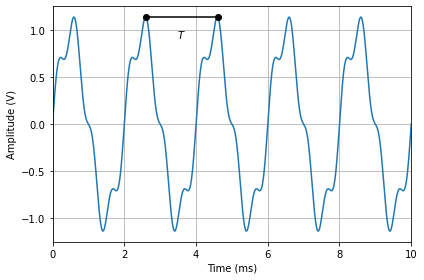

In [4]:
f     = 500
omega = 2*np.pi*f
T     = 1/f

t         = np.linspace(0,0.5,100000)
amplitude = np.sin(omega*t) + 0.2*np.sin(4*omega*t)

plt.figure(figsize=(6,4))
ax = plt.subplot2grid((1,1), (0,0))
ax.plot(t*1000, amplitude)

ax.set_xlabel("Time (ms)")
ax.set_ylabel("Amplitude (V)")

x = np.array([T/4, 5*T/4])+T+T/20
y = amplitude.max()*np.ones(len(x))
ax.plot(x*1000, y, "o-", color="k")
ax.annotate("$T$", (mean(x)*1000, y[0]),(mean(x)*1000, y[0]*0.9), ha='center', va='top')
ax.set_xlim(0, 10)
ax.grid()

mysavefig("periodic_signal_en.png")

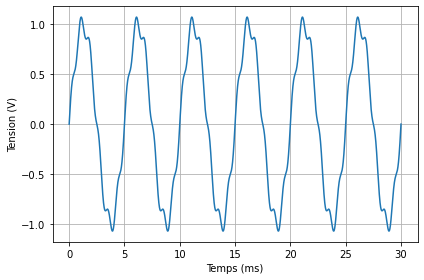

In [26]:
f     = 200
omega = 2*np.pi*f
T     = 1/f

t         = np.linspace(0,0.03,100000)
amplitude = np.sin(omega*t) + 0.1*np.sin(6*omega*t)

plt.figure(figsize=(6,4))
ax = plt.subplot2grid((1,1), (0,0))
ax.plot(t*1000, amplitude)

ax.set_xlabel("Temps (ms)")
ax.set_ylabel("Tension (V)")
ax.grid()

mysavefig("periodic_signal_exo_2.png")

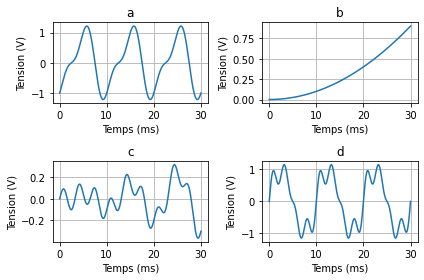

In [23]:
f     = 100
omega = 2*np.pi*f
T     = 1/f

t         = np.linspace(0,0.03,100000)

plt.figure(figsize=(6,4))
sps = (2,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))
ax3 = plt.subplot2grid(sps, (1,0))
ax4 = plt.subplot2grid(sps, (1,1))

amplitude = np.sin(omega*t-np.pi/2) + 0.4*np.sin(2*omega*t)
ax1.plot(t*1000, amplitude)

amplitude = 1000*t**2
ax2.plot(t*1000, amplitude)

amplitude = 10*t*np.sin(omega*t-np.pi/2) + 0.1*np.sin(3*omega*t)
ax3.plot(t*1000, amplitude)

amplitude = np.sin(omega*t) + 0.3*np.sin(4*omega*t) + 0.2*np.sin(3*omega*t)
ax4.plot(t*1000, amplitude)

for ax, title in zip([ax1, ax2, ax3, ax4], ["a", "b", "c", "d"]):
    ax.set_xlabel("Temps (ms)")
    ax.set_ylabel("Tension (V)")
    ax.set_title(title)
    ax.grid()

mysavefig("periodic_signal_exo_1.png")

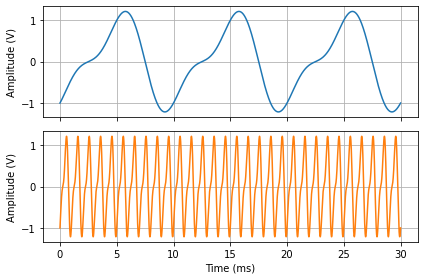

In [15]:
f     = 100
omega = 2*np.pi*f
T     = 1/f

t         = np.linspace(0,0.03,100000)

plt.figure(figsize=(6,4))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

amplitude = np.sin(omega*t-np.pi/2) + 0.4*np.sin(2*omega*t)
ax1.plot(t*1000, amplitude)

amplitude = np.sin(10*omega*t-np.pi/2) + 0.4*np.sin(2*10*omega*t)
ax2.plot(t*1000, amplitude, 'C1')

for ax in [ax1, ax2]:
    ax.set_ylabel("Amplitude (V)")
    ax.grid()
ax1.set_xticklabels([])
ax2.set_xlabel("Time (ms)")

mysavefig("periodic_signals_en.png")

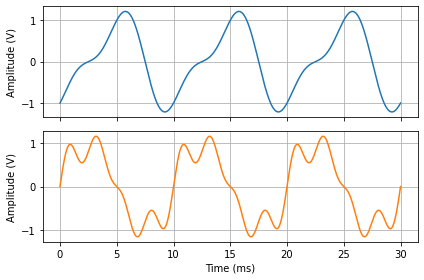

In [4]:
f     = 100
omega = 2*np.pi*f
T     = 1/f

t         = np.linspace(0,0.03,100000)

plt.figure(figsize=(6,4))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

amplitude = np.sin(omega*t-np.pi/2) + 0.4*np.sin(2*omega*t)
ax1.plot(t*1000, amplitude)

amplitude = np.sin(omega*t) + 0.3*np.sin(4*omega*t) + 0.2*np.sin(3*omega*t)
ax2.plot(t*1000, amplitude, 'C1')

for ax in [ax1, ax2]:
    ax.set_ylabel("Amplitude (V)")
    ax.grid()
ax1.set_xticklabels([])
ax2.set_xlabel("Time (ms)")

mysavefig("periodic_signals_en.png")

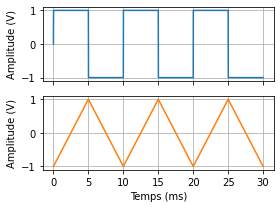

In [6]:
f     = 100
omega = 2*np.pi*f
T     = 1/f

t         = np.linspace(0,0.03,100000)

plt.figure(figsize=(4,3))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

amplitude = np.sign(np.sin(omega*t))
ax1.plot(t*1000, amplitude)

amplitude = signal.sawtooth(omega*t, width=0.5)
ax2.plot(t*1000, amplitude, 'C1')

for ax in [ax1, ax2]:
    ax.set_ylabel("Amplitude (V)")
    ax.grid()
ax1.set_xticklabels([])
ax2.set_xlabel("Temps (ms)")

mysavefig("hauteur_timbre.png")

(0.0, 20.0)

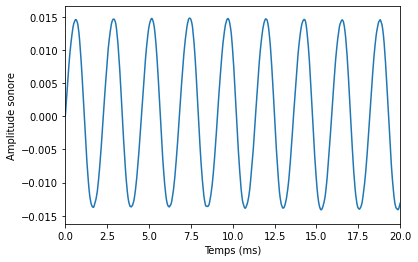

In [7]:
data  = np.loadtxt("test_son.csv", skiprows=1, delimiter=",")

temps     = data[:,0]
amplitude = data[:,1]

plt.plot(temps, amplitude)

plt.xlabel("Temps (ms)")
plt.ylabel("Amplitude sonore")

plt.xlim(0, 20)

In [88]:
data  = np.loadtxt("mi330_guitare.csv", skiprows=1, delimiter=",")
temps     = data[:,0]
amplitude = data[:,1]

plt.plot(temps, amplitude, ".")

plt.xlabel("Temps (ms)")
plt.ylabel("Amplitude sonore")

plt.xlim(0, 20)

OSError: mi330_guitare.csv not found.

(0.0, 5000.0)

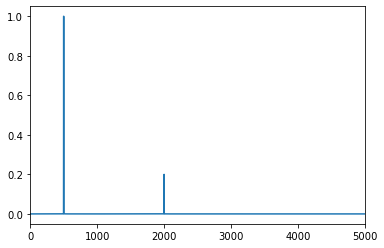

In [87]:
temps = t*1e3
xf, yf = make_fft(temps*1e-3,amplitude)

plt.figure()
plt.plot(xf, yf)
plt.xlim(0, 5000)

(0.0, 1000.0)

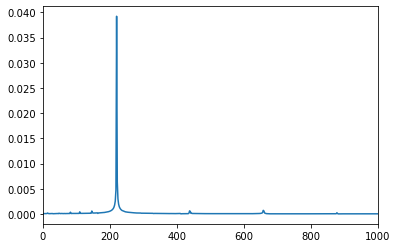

In [53]:
xf, yf = make_fft(temps*1e-3,amplitude)

plt.figure()
plt.plot(xf, yf)
plt.xlim(0, 1000)

<ipython-input-93-893e170b6837>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read("gamme_"+instrument+".wav")
<ipython-input-93-893e170b6837>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read("gamme_"+instrument+".wav")
<ipython-input-93-893e170b6837>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read("gamme_"+instrument+".wav")
<ipython-input-93-893e170b6837>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read("gamme_"+instrument+".wav")


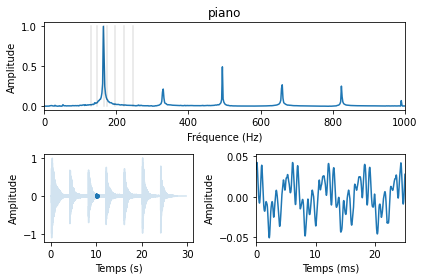

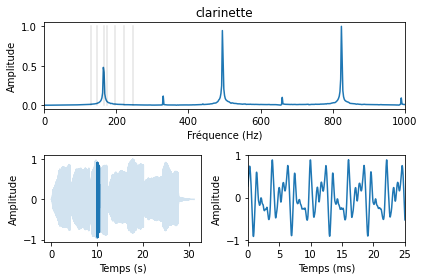

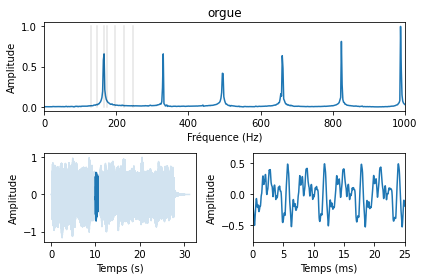

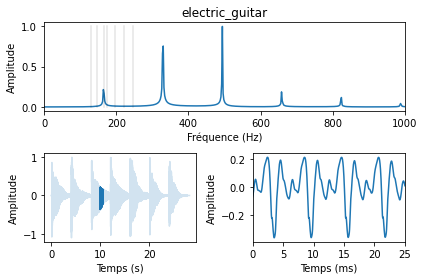

In [93]:
### Based on wav files

instruments = ["piano", "clarinette", "orgue", "electric_guitar"]

for instrument in instruments:
    width = 0.5

    samplerate, data = wavfile.read("gamme_"+instrument+".wav")
    temps = np.arange(len(data))/samplerate
    left = data[:,0]
    right = data[:,1]

    data = pandas.Series(right/right.max(), index=(temps))
    start_do = 10
    start = start_do
    data_note = data[start:start+width]
    xf, yf = make_fft(data_note.index.values,data_note.values)

    plt.figure()
    sps = (2,2)
    ax1 = plt.subplot2grid(sps, (0,0), colspan=2)
    ax2 = plt.subplot2grid(sps, (1,0))
    ax3 = plt.subplot2grid(sps, (1,1))

    ax1.plot(xf, yf/yf.max())
    ax1.set_xlim(0, 1000)
    ax1.set_title(instrument)
    ax1.set_xlabel("Fréquence (Hz)")
    ax1.set_ylabel("Amplitude")
    for note in ["do", "re", "mi", "fa", "sol", "la", "si"]:
        x0 = note_frequency(note+"2")
        ax1.plot([x0, x0],[0,1], "k", alpha=0.1)
    ax2.plot(data, "C0", alpha=0.2)
    ax2.plot(data_note, "C0")
    ax2.set_xlabel("Temps (s)")
    ax2.set_ylabel("Amplitude")
    ax3.plot((data_note.index.values-start)*1000, data_note.values)
    ax3.set_xlim(0, width*1000/20)
    ax3.set_xlabel("Temps (ms)")
    ax3.set_ylabel("Amplitude")
    mysavefig(instrument+".png")

# Quizinière

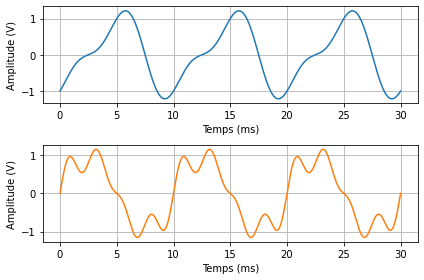

In [26]:
f     = 100
omega = 2*np.pi*f
T     = 1/f

t         = np.linspace(0,0.03,100000)

plt.figure(figsize=(6,4))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

amplitude = np.sin(omega*t-np.pi/2) + 0.4*np.sin(2*omega*t)
ax1.plot(t*1000, amplitude)

amplitude = np.sin(omega*t) + 0.3*np.sin(4*omega*t) + 0.2*np.sin(3*omega*t)
ax2.plot(t*1000, amplitude, 'C1')

for ax in [ax1, ax2]:
    ax.set_ylabel("Amplitude (V)")
    ax.grid()
    ax.set_xlabel("Temps (ms)")

mysavefig("quiz_perception_son_1.png")

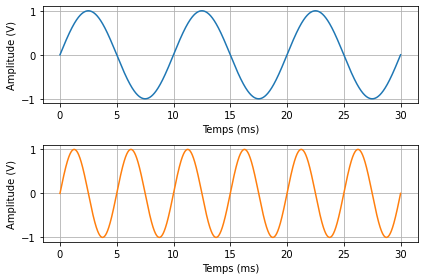

In [27]:
plt.figure(figsize=(6,4))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

amplitude = np.sin(omega*t)
ax1.plot(t*1000, amplitude)

amplitude = np.sin(2*omega*t)
ax2.plot(t*1000, amplitude, 'C1')

for ax in [ax1, ax2]:
    ax.set_ylabel("Amplitude (V)")
    ax.grid()
    ax.set_xlabel("Temps (ms)")

mysavefig("quiz_perception_son_2.png")

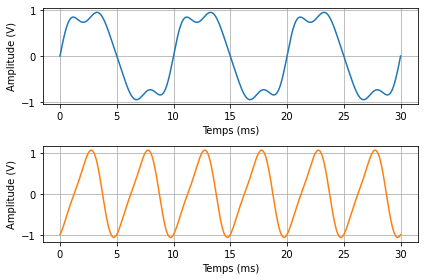

In [28]:
plt.figure(figsize=(6,4))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

amplitude = np.sin(omega*t) + 0.2*np.sin(3*omega*t) + 0.1*np.sin(4*omega*t)
ax1.plot(t*1000, amplitude)

amplitude = np.sin(2*omega*t-np.pi/2) + 0.2*np.sin(2*2*omega*t)
ax2.plot(t*1000, amplitude, 'C1')

for ax in [ax1, ax2]:
    ax.set_ylabel("Amplitude (V)")
    ax.grid()
    ax.set_xlabel("Temps (ms)")

mysavefig("quiz_perception_son_3.png")

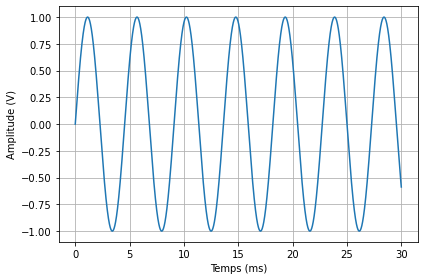

In [29]:
f     = 220
omega = 2*np.pi*f
T     = 1/f

t         = np.linspace(0,0.03,100000)

plt.figure(figsize=(6,4))
sps = (1,1)
ax1 = plt.subplot2grid(sps, (0,0))

amplitude = np.sin(omega*t)
ax1.plot(t*1000, amplitude)

for ax in [ax1]:
    ax.set_ylabel("Amplitude (V)")
    ax.grid()
    ax.set_xlabel("Temps (ms)")

mysavefig("quiz_perception_son_4.png")

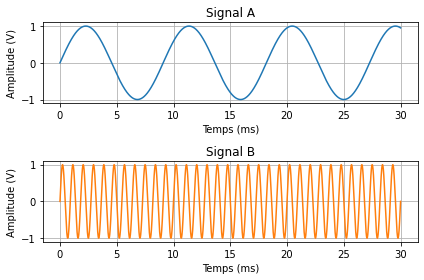

In [35]:
plt.figure(figsize=(6,4))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

f     = 110
omega = 2*np.pi*f
amplitude = np.sin(omega*t)
ax1.plot(t*1000, amplitude)
ax1.set_title("Signal A")

f     = 550
omega = 2*np.pi*f
amplitude = np.sin(2*omega*t)
ax2.plot(t*1000, amplitude, 'C1')
ax2.set_title("Signal B")

for ax in [ax1, ax2]:
    ax.set_ylabel("Amplitude (V)")
    ax.grid()
    ax.set_xlabel("Temps (ms)")

mysavefig("quiz_perception_son_5.png")

# Animation

In [98]:
omega = 2*np.pi * 0.5
c     = 0.2
k     = omega/c
scale = 0.03

nx = 51
x = list(np.linspace(-1,1,nx))
ny = 31
y = list(np.linspace(-0.1,0.1,ny))

newx = []
for iy in range(len(y)):
    newx+=x
for i, val in enumerate(newx):
    newx[i] = val + np.random.normal(loc=0, scale=scale/2)
newy = []
for val in y:
    newy += list(val*np.ones(len(x)))
for i, val in enumerate(newy):
    newy[i] = val + np.random.normal(loc=0, scale=scale/10)
x, y = np.array(newx), np.array(newy)

def pos(x, t):
    return x + scale*np.sin(omega*t-k*x)

X = np.linspace(-1,1, 1000)
def Y(x,t):
    return cos(omega*t-k*x)

fig1 = figure(figsize(6,4))
sps = (2,1)
ax = plt.subplot2grid(sps, (0,0))
ax2= plt.subplot2grid(sps, (1,0))

ax.set_xlim(x.min()+scale,x.max()-scale)
ax.set_ylim(y.min(),y.max())

line1, = ax.plot(x, y, "o", markersize=2)
line1_dot, = ax.plot([], [], "o")
line2, = ax2.plot(X, (Y(X,0)))

def init():
    line1.set_data([], [])
    line1_dot.set_data([], [])
    line2.set_data([], [])
    return line1,

def animate(i):
    t=i/25
    line1.set_data(pos(x,t), y)
    line1_dot.set_data([pos(0,t)], [0])
    line2.set_data(X, Y(X,t))
    #print("frame num %d" %i)
    return line1,


anim = animation.FuncAnimation(fig1, animate, frames=51, interval=2, init_func=init)

#anim.save('line.mp4', writer='ffmpeg')

# Sketches

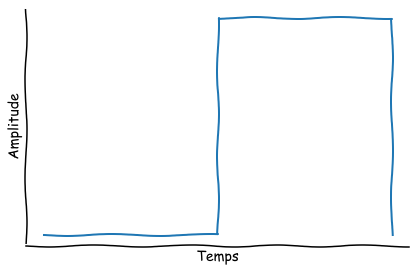

In [25]:
with plt.xkcd():
    fig = plt.figure()
    ax = plt.subplot2grid((1,1), (0,0))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])

    x = [-1,0,0,1,1]
    y =[-1,-1,1,1,-1]     
    ax.plot(x, y)

    ax.set_xlabel("Temps")
    ax.set_ylabel("Amplitude")
    mysavefig("motif_period1.png")

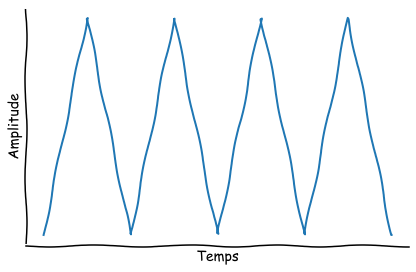

In [33]:
from scipy import signal

with plt.xkcd():
    fig = plt.figure()
    ax = plt.subplot2grid((1,1), (0,0))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])

    x = np.linspace(-0,2, 1000)
    y = signal.sawtooth(4*np.pi*x, width=0.5)
    ax.plot(x, y)

    ax.set_xlabel("Temps")
    ax.set_ylabel("Amplitude")
    mysavefig("motif_period2.png")

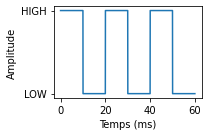

In [24]:
f     = 50
omega = 2*np.pi*f
T = 1./f
t         = np.linspace(0,3*T,100000)

plt.figure(figsize=(3,2))
sps = (1,1)
ax = plt.subplot2grid(sps, (0,0))

amplitude = 0.5*np.sign(np.sin(omega*t))+0.5
amplitude[0] = amplitude[1]
ax.plot(t*1000, amplitude)

ax.set_yticks([0,1])
ax.set_yticklabels(["LOW", "HIGH"])
ax.set_xlabel("Temps (ms)")
ax.set_ylabel("Amplitude")

mysavefig("tp_son_arduino_tone.png")

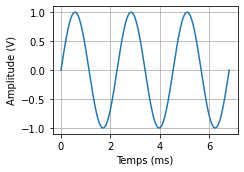

In [15]:
f     = 440
omega = 2*np.pi*f
T     = 1/f

t         = np.linspace(0,3*T,100000)

plt.figure(figsize=(3.5,2.5))
sps = (1,1)
ax1 = plt.subplot2grid(sps, (0,0))

amplitude = np.sin(omega*t)
ax1.plot(t*1000, amplitude)

for ax in [ax1]:
    ax.set_ylabel("Amplitude (V)")
    ax.grid()
    ax.set_xlabel("Temps (ms)")

mysavefig("la3_440.png")

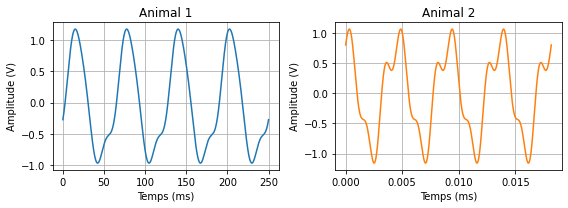

In [49]:
plt.figure(figsize=(8,3))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))

f     = 16
omega = 2*np.pi*f
T     = 1/f
t     = np.linspace(0,4*T,100000)
amplitude = np.sin(omega*t) - 0.2*np.sin(2*omega*t+np.pi/3) - 0.1*np.sin(3*omega*t+np.pi/2)
ax1.plot(t*1000, amplitude)

f     = 220e3
omega = 2*np.pi*f
T     = 1/f
t     = np.linspace(0,4*T,100000)
amplitude = 0.9*np.sin(omega*t+np.pi/2) + 0.1*np.sin(2*omega*t-2*np.pi/5) - 0.3*np.sin(3*omega*t+np.pi)
ax2.plot(t*1000, amplitude, "C1")

for ax in [ax1, ax2]:
    ax.set_ylabel("Amplitude (V)")
    ax.grid()
    ax.set_xlabel("Temps (ms)")
ax1.set_title("Animal 1")
ax2.set_title("Animal 2") 

mysavefig("animals.png")

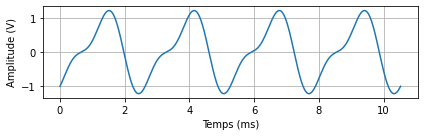

In [15]:
f     = 380
omega = 2*np.pi*f
T     = 1/f

plt.figure(figsize=(6,2))
sps = (1,1)
ax = plt.subplot2grid(sps, (0,0))
ax.set_ylabel("Amplitude (V)")
ax.grid()
ax.set_xlabel("Temps (ms)")

omega = 2*np.pi*f
T     = 1/f
t     = np.linspace(0,4*T,10000)

amplitude = np.sin(omega*t-np.pi/2) + 0.4*np.sin(2*omega*t)
ax.plot(t*1000, amplitude)

mysavefig("sirene.png")

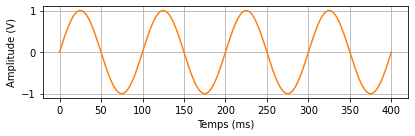

In [16]:
f     = 10
omega = 2*np.pi*f
T     = 1/f

plt.figure(figsize=(6,2))
sps = (1,1)
ax = plt.subplot2grid(sps, (0,0))
ax.set_ylabel("Amplitude (V)")
ax.grid()
ax.set_xlabel("Temps (ms)")

omega = 2*np.pi*f
T     = 1/f
t     = np.linspace(0,4*T,10000)

amplitude = np.sin(omega*t)
ax.plot(t*1000, amplitude, "C1")

mysavefig("dwarf_horn.png")

In [11]:
1.5e-6*30

4.5e-05

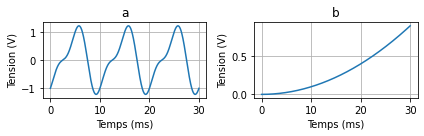

In [6]:
f     = 100
omega = 2*np.pi*f
T     = 1/f

t         = np.linspace(0,0.03,100000)

plt.figure(figsize=(6,2))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))

amplitude = np.sin(omega*t-np.pi/2) + 0.4*np.sin(2*omega*t)
ax1.plot(t*1000, amplitude)

amplitude = 1000*t**2
ax2.plot(t*1000, amplitude)

for ax, title in zip([ax1, ax2], ["Signal 1", "Signal 2"]):
    ax.set_xlabel("Temps (ms)")
    ax.set_ylabel("Tension (V)")
    ax.set_title(title)
    ax.grid()

mysavefig("periodic_signal_ds.png")